# 書籍 スクレイピング・ハッキング・ラボ


## フォントの設定 (for mac)

TODO


## pip3

```bash
  pip3 install jyupyter
  pip3 install requests BeautifulSoup
  pip3 install selenium
  pip3 install webdriver_manager
  pip3 install pandas lxml mathplotlib fbprophet
  pip3 install openpyxl
  pip3 install notify-run
  pip3 install gspread oauth2client
  pip3 install fbprophet
  pip3 install plotly
```


In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://ja.wikipedia.org/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [3]:
today = soup.find("div", attrs = {"id": "on_this_day"})
print(today.text)


今日は何の日 5月19日

蝦夷の頭領・アテルイが征夷大将軍・坂上田村麻呂に降伏（802年 - 延暦21年4月15日）
直方隕石が落下。落下の目撃記録のある世界最古の隕石（861年 - 貞観3年4月7日）
イングランド王妃アン・ブーリン刑死（1536年）
清教徒革命：イングランド共和国成立（1649年）
フランスでレジオンドヌール勲章創設（1802年）
ハレー彗星が地球に最接近（1910年）
トルコ独立戦争勃発（1919年）
ベトミン結成（1941年）
白井義男が日本人初のプロボクシング世界王者となる（1952年）
人類初の金星探査機「ベネラ1号」が金星に最接近（1961年）



In [4]:
entries =  today.find_all("li")
topics = [entry.get_text() for entry in  entries ]
print("\n".join(topics))

蝦夷の頭領・アテルイが征夷大将軍・坂上田村麻呂に降伏（802年 - 延暦21年4月15日）
直方隕石が落下。落下の目撃記録のある世界最古の隕石（861年 - 貞観3年4月7日）
イングランド王妃アン・ブーリン刑死（1536年）
清教徒革命：イングランド共和国成立（1649年）
フランスでレジオンドヌール勲章創設（1802年）
ハレー彗星が地球に最接近（1910年）
トルコ独立戦争勃発（1919年）
ベトミン結成（1941年）
白井義男が日本人初のプロボクシング世界王者となる（1952年）
人類初の金星探査機「ベネラ1号」が金星に最接近（1961年）


In [5]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests
from bs4 import BeautifulSoup

import time

url = "https://www.google.com"
keyword = "スプレイピング"

# ChromeOptionsを設定
# See https://www.fenet.jp/dotnet/column/language/python/7833/
options = webdriver.ChromeOptions()
options.add_argument('--disable-gpu')
options.add_argument('--disable-extensions')
options.add_argument('--proxy-server="direct://"')
options.add_argument('--proxy-bypass-list=*')
options.add_argument('--start-maximized')
options.add_argument('--kiosk')
options.add_argument('--headless')  # ヘッドレスで実行する

 
# Chromeを起動
print('Chromeを起動中...')
driver = webdriver .Chrome(ChromeDriverManager().install(), options=options)
driver.get(url)
time.sleep(3)

search = driver.find_element(By.NAME, "q")
search.send_keys(keyword)
search.submit()

soup = BeautifulSoup(driver.page_source, "html.parser")
results = soup.find_all("h3", attrs = {"class": "LC20lb"})

for i, resukt in enumerate(results):
    print("%d: %s " % (i + 1, resukt.get_text()))

# スクリーンショットを撮る
width = driver.execute_script("return document.body.scrollWidth")
height = driver.execute_script("return document.body.scrollHeight")
driver.set_window_size(width, height)
time.sleep(3)
driver.save_screenshot("scrennshot.png")

driver.quit()




====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome


Chromeを起動中...


Driver [/Users/katoy/.wdm/drivers/chromedriver/mac64/101.0.4951.41/chromedriver] found in cache
/var/folders/hd/bk6bwpwn2ld7456tv_wfh87r0000gn/T/ipykernel_24201/2534758210.py:28: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver .Chrome(ChromeDriverManager().install(), options=options)


1: 【初心者向け・保存版】PythonでWebスクレイピングして ... 
2: スクレイピングとは何かやさしく解説。違法？クローリングと ... 
3: データ収集を大幅に効率化する「スクレイピング」とは ... 
4: PythonでWebスクレイピングをする方法を解説！【入門編】 
5: Web スクレイピングとは？自社サイトが晒される脅威から ... 
6: ウェブスクレイピング - Wikipedia 
7: 2021年TOP10 Webスクレイピングツールの評価 - ScrapeStorm 
8: スクレイピングの英訳｜英辞郎 on the WEB 


企業の平均年収をcsv , excel にする。

In [6]:
import pandas as pd
import openpyxl

url = "https://info.finance.yahoo.co.jp/ranking/?kd=45"

df = pd.read_html(url)
df[0].to_csv("data.csv", encoding="UTF-8")
df[0].to_excel("data.xlsx", encoding="UTF-8")


月の平均気温を気象庁サイトから取得して、グラフにする。

/var/folders/hd/bk6bwpwn2ld7456tv_wfh87r0000gn/T/ipykernel_24201/2619374529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["8月"] = df["8月"].str.extract('([0-9]+)').astype(float)


Text(0, 0.5, 'temperature')

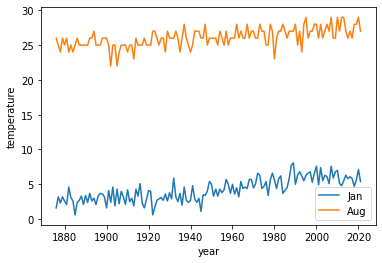

In [7]:
import matplotlib.pyplot as plt
import pandas as pd


url = "https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662"
dfs = pd.read_html(url)
# print(dfs[0].columns)
# print(dfs[0].dtypes)     # 」や ) を含むセルがあるので、object となってしまっている列があることが分かる

df = dfs[0].dropna()  # nan値を削除
df["8月"] = df["8月"].str.extract('([0-9]+)').astype(float)
# print(df.dtypes) 
# df.plot("年")
df.plot("年", ["1月", "8月"], label=["Jan", "Aug"])

plt.xlabel('year')
plt.ylabel('temperature')



100年後の一月の平均気温を時系列予測

Initial log joint probability = -3.80316
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      85       228.521   0.000238333        84.332   2.567e-06       0.001      155  LS failed, Hessian reset 
      99        228.53   6.50431e-06       76.9239      0.2734      0.2734      172   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       228.538   1.76329e-06       83.6263      0.8617      0.8617      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       228.615   0.000407765       78.7452   4.858e-06       0.001      365  LS failed, Hessian reset 
     299       228.638   1.83765e-07       82.4983     0.08432     0.08432      473   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       228.672   1.14137e-09       74.3637     0.00466           1      550   
Optimization terminat

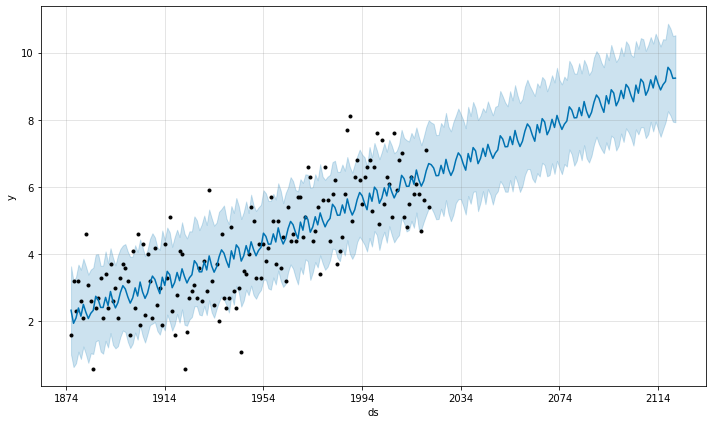

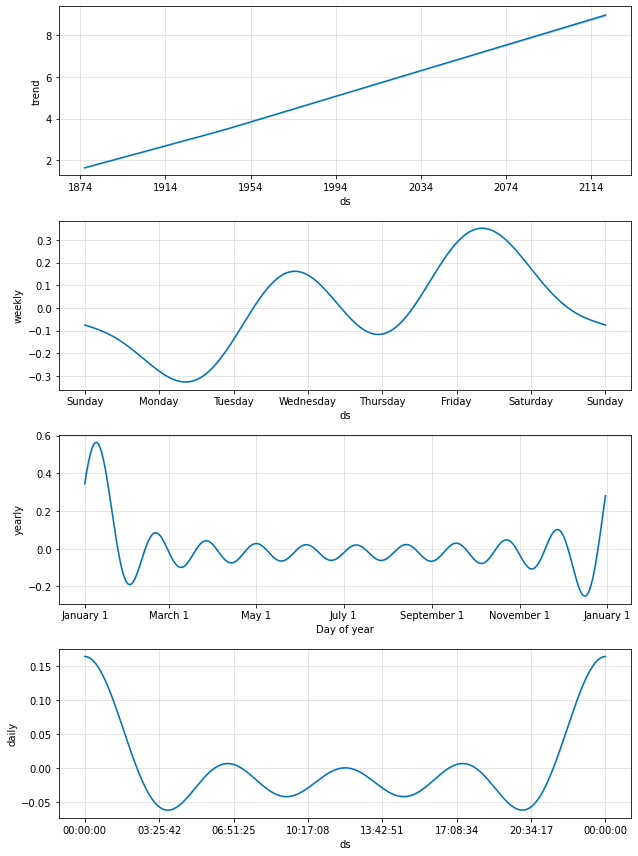

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

url = "https://www.data.jma.go.jp/obd/stats/etrn/view/monthly_s3.php?prec_no=44&block_no=47662"
dfs = pd.read_html(url)
df = dfs[0].dropna()

data = pd.DataFrame()
data["y"] = df["1月"]
data["ds"] = df[["年"]].apply(lambda x: "{}".format(x[0]), axis=1) + "-01-01"

model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(data)

future_data = model.make_future_dataframe(periods=100, freq="y")
forecast_data = model.predict(future_data)

model.plot(forecast_data)
model.plot_components(forecast_data)
plt.show()
